# SEN163A – Assignment 2 - Large-scale Internet Data Analysis


## Group 14
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - '' 5597668''

### Feedback To Do list:

#### Functional Tasks
[] a. You mention only a few internal inconsistencies (missing data, wrong format, etc.) of the AS and probe datasets each separately. Think also about things that may go wrong (limitations) about the *combination* of them.
[] b. Your response is "Number of probes in the RIPE, probe and AS datasets within the EU: 60087". But in this question we are not interested in a number of probes, but in the number of ASN's. Also, for this question, it is not necessary to merge the RIPE dataset, only the AS and probe datasets are sufficient.
[] c. d. I think I have an idea what's wrong with your answer to d:  you calculated mean latency for a WHOLE COUNTRY. You should have calculated mean latency per ASN, and then choose ONE ASN PER COUNTRY (the one with smallest mean latency for ips in that country.).
[] e. Taking just four best countries is no good. You should consider each possible combination of four ASN's. For each combination, measure the total latency of that combination to all countries. Pick the best combination of four ASNs.

#### Report Quality
[] Report structure is untidy and a bit unsatisfactory: missing an introduction, conclusion, section about problem description, dataset description...
[] Some typos and grammatical issues, the report would benefit from an extra round of proofreading.
[] Your dataset description could be improved by talking a bit more about the context: where the datasets come from, how they related to each other, which pieces are relevant to you and which are not.

## a. Evaluate if there are limitations in the provided datasets (AS and probe data set). If you find limitations, describe these and conjecture possible reasons, supported with data

### Probe Dataset
First of all we opened the probe data set as a dataframe using the pickle module. As a first step we received the number of columns and rows. 
As also shown after sorting by values beneath, there are two columns named: 
  - prb_id
  - `ASN`

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"



In [2]:
import pickle

with open("./datasets/probe_dataset.pkl", 'rb') as file:
    df_probe = pickle.load(file)

print(df_probe.shape)
df_probe.head()


(11008, 2)


,prb_id,ASN
0,1,AS3265
1,2,AS1136
2,3,AS3265
3,6,AS6830
4,8,AS3265


For this part, we will be looking into missing values and if data is correct/consistent. We try to find such limitations and describe them with the help of the code that is shown. We will do this in a couple of ways, like computing the amount of rows with 0 IPs, looking at the types of AS and by making a plot with the numIPs with the frequencies. Also, we consider if the available columns/data are sufficient for the analysis.

As can be seen in the table below, the probe dataset has missing probe ID's, as the probe ID's have been put in order by their number. These could be seen as missing data/values in the dataset.

In [3]:
#sorting ascending by prb_id -> Many Probe ID's missing inbetween
df_probe.sort_values(by='prb_id', ascending=True)

,prb_id,ASN
0,1,AS3265
1,2,AS1136
2,3,AS3265
3,6,AS6830
4,8,AS3265
...,...,...
11003,1000242,AS49432
11004,1000243,AS6830
11005,1000244,AS7155
11006,1000245,AS15802


### AS Dataset
The AS dataset consists of 5 columns:
  - `ASN`
  - Country code
  - Network name
  - Total number of IPs in network
  - Type of network
This datset gives us the number of IPs and the locations. The output of the code below shows the data of the first and last couple of rows from the AS dataset.

In [4]:
import pandas
df_AS = pandas.read_pickle("./datasets/AS_dataset.pkl")
df_AS = df_AS.rename(columns={"type": "type_AS"})
df_AS.head()


,ASN,Country,Name,NumIPs,type_AS
0,AS55330,AF,AFGHANTELECOM GOVERNMENT COMMUNICATION NETWORK,"50,432",hosting
1,AS17411,AF,Io Global Services Pvt. Limited,"13,568",business
2,AS55424,AF,Instatelecom Limited,"13,312",business
3,AS38742,AF,AWCC,"11,520",isp
4,AS131284,AF,Etisalat Afghan,"10,240",isp


In [5]:
df_AS.tail()

,ASN,Country,Name,NumIPs,type_AS
60117,AS37332,ZW,Zimbabwe Online,0,education
60118,AS37344,ZW,ZIMBABWE OPEN UNIVERSITY,0,business
60119,AS37355,ZW,Zimbabwe Internet Exchange,0,business
60120,AS37391,ZW,Esmalo Enterprises,0,business
60121,AS37485,ZW,Data Control and Systems,0,business


Next, we are looking at missing values in the probe and AS dataset, which is analyzed with the upcoming pieces of code.
As you can see, the output reveals that there are no missing values when we try to detect it in the dateset. So while there are missing probe ID's in the probe dataset, the probe and AS dataset doesn't seem to have other missing data.

In [6]:
# Evaluate the AS dataset
# look for missing values
listings = df_AS
print(listings.isna())
# look for any missing values in any column
print(listings.isna().any().any())


         ASN  Country   Name  NumIPs  type_AS
0      False    False  False   False    False
1      False    False  False   False    False
2      False    False  False   False    False
3      False    False  False   False    False
4      False    False  False   False    False
...      ...      ...    ...     ...      ...
60117  False    False  False   False    False
60118  False    False  False   False    False
60119  False    False  False   False    False
60120  False    False  False   False    False
60121  False    False  False   False    False

[60122 rows x 5 columns]
False


In [7]:
# Evaluate the probe dataset
# look for missing values
listings = df_probe
print(listings.isna())

print(listings.isna().any().any())

       prb_id    ASN
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
11003   False  False
11004   False  False
11005   False  False
11006   False  False
11007   False  False

[11008 rows x 2 columns]
False


We also want to check how many rows in the AS dataset exist where the value for NumIPs is equal to 0. This would mean that the ASNs don't have IP numbers, which would be strange in this dataset.
The output says that there a 15107 of these ASNs, which is a lot considering this dataset has about 60000 total rows. The conclusion here is that about 25% of all rows does not include a single IP address.

In [8]:
# only use a subset with numips==0
df_AS_only_zero = df_AS[df_AS["NumIPs"]=='0'] # subset with condition
print(len(df_AS_only_zero.index)) # count number of rows in dataframe
df_AS_only_zero.head()

15107


,ASN,Country,Name,NumIPs,type_AS
50,AS133141,AF,NetZone Limited,0,business
51,AS139697,AF,Mikrogate ICT Services Company,0,education
52,AS45521,AF,Multinet Afghanistan AS in Kandaghar,0,business
53,AS45784,AF,Multinet Afghanistan AS in Herat,0,business
54,AS45790,AF,Multinet Afghanistan AS in Mazar-E-Sharif,0,isp


Next, we check all the different values in the dataset for the variable type_AS, to see if there are strange occurrences.
There are 5 different values with one being unknown, which could be seen as incomplete data or a missing value.

In [9]:
# look at all the possible values for type_AS

print(df_AS['type_AS'].unique())


['hosting' 'business' 'isp' 'education' 'unk']


Lastly, we plot a histogram to visualize the AS dataset better. For the plot, we look at the amount of IP addresses involved with one ASN and look how frequent each number of IPs per ASN is occurring in the dataset. With this we try to see for significant values.
In the histogram you can see that there are strong outliers in the dataset with extremely high amount of IP addresses that occur frequently. Overal, the histogram shows that the data is reasonably balanced and that the is a reoccurring theme where the low amount of IPs is most frequent with a lot of ASNs.

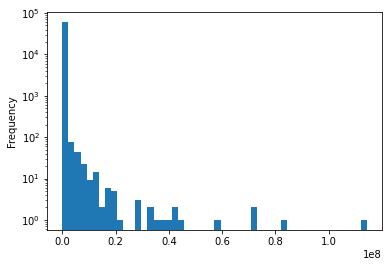

In [10]:
# plot the number of IP addresses (histogram)
import matplotlib.pyplot as plt
df_AS['NumIPs'].str.replace(",","").astype(int).plot.hist(bins=50, log=True)
plt.savefig('test.png') # save it as file
plt.show()

#Conclusion Question 1:
There are no missing values in the AS and probe dataset that we detected, while there were missing probe IDs in the probe dataset.
About 25% of all rows do not include a single IP, meaning the NumIPs is equal to zero.
Some type_AS data is defined as unknown, meaning this data is not available in the AS dataset.
The available columns provide enough information for this analysis, because we are able to link it to the other provided datasets and the AS dataset provides sufficient information about the ASNs to determine suitable hosts in the EU.

### RIPE

The RIPE dataset is visualized with the cells below. The RIPE dataset contains ping measurements. This dataset contains a lot of information about these measurements that are executed by a select number of probes to most IPv4 addresses in the world. Some of the latencies in the RIPE dataset equal -1, which is strange. When the value of last time synchronized is eqaul to -1, it means that the probe does not know whether it is in sync with a controller.
We check the unique values for 'from' and we also check if `dst_name` and `dst_addr` are always the same, which is not the case according to the output.

In [11]:
import timeit
import pandas

file_location = './datasets/ping-2022-03-01T1000.bz2'
# Importing
df_ripe = pandas.read_json(file_location, lines = True, nrows = 1e5)
df_ripe = df_ripe.rename(columns={"type": "type_ping"})
df_ripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   fw         100000 non-null  int64         
 1   mver       95463 non-null   object        
 2   lts        100000 non-null  int64         
 3   dst_name   100000 non-null  object        
 4   af         100000 non-null  int64         
 5   dst_addr   99532 non-null   object        
 6   src_addr   99530 non-null   object        
 7   proto      100000 non-null  object        
 8   ttl        82723 non-null   float64       
 9   size       100000 non-null  int64         
 10  result     100000 non-null  object        
 11  dup        100000 non-null  int64         
 12  rcvd       100000 non-null  int64         
 13  sent       100000 non-null  int64         
 14  min        100000 non-null  float64       
 15  max        100000 non-null  float64       
 16  avg        100000 non

In [12]:
# Check how many "from" addresses are unique
df_ripe['from'].nunique()

7161

In [13]:
%%script false --no-raise-error
# Time estimation -> Rather unreliable actually, it takes much less than that
## Note: The more lines imported in "one go", the more efficient it becomes
num_lines_to_test = 1e5
num_lines_file = sum(1 for _ in open(file_location, encoding = "ISO-8859-1")) # get the number of lines in the file
stmt = f'pandas.read_json("{file_location}", lines = True, nrows = {num_lines_to_test})' # what to run on timeit
setup = 'import pandas'
loading_time = timeit.timeit(stmt=stmt, setup=setup, number=100) # Measure how long it takes to load 100 lines 100 times on average
time_estimation = num_lines_file/num_lines_to_test*loading_time
print(f"The entire file would take {time_estimation/60} mins ({time_estimation/3600} hrs) to load")
print(f"The file has {num_lines_file} lines")


Couldn't find program: 'false'


In [14]:
# dst_name vs dst_addr
df_ripe['dst_name'].equals(df_ripe['dst_addr'])

False

### IP datasets

#### IPv4 dataset
The IP addresses are in integer format.
Lots of addresses don't specify a country_code or country_name. Those are removed.

Regarding the data structure of the IPv4-dataset, there are four columns:
- `ip_to` describes the the lower boundary for a sample of IP-adresses
- `ip_to` describes the upper boundary for a sample of IP-adresses 
- `country_code` and `country_name` describe the country which belongs to the IP samples defined with `ip_to` and `ip_to`

Since the IP data was given as integers, we converted them into IP adresses format.

In [15]:
import pandas as pd
df_ipv4 = pd.read_csv("datasets/IP2LOCATION-LITE-DB1.CSV", names=["ip_from", "ip_to", "country_code", "country_name"])
df_ipv4.drop(df_ipv4[df_ipv4["country_name"] == '-'].index, axis=0, inplace=True) # Drop rows if there is no country code
df_ipv4.dropna(inplace=True) # drop emtpy rows
df_ipv4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208494 entries, 1 to 212145
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ip_from       208494 non-null  int64 
 1   ip_to         208494 non-null  int64 
 2   country_code  208494 non-null  object
 3   country_name  208494 non-null  object
dtypes: int64(2), object(2)
memory usage: 8.0+ MB


In [16]:
# Convert int ip to, well, IP format
import ipaddress
for ip in ('ip_from', 'ip_to',):
    df_ipv4[f"{ip}_formatted"] = df_ipv4[ip].apply(ipaddress.ip_address)
print(len(df_ipv4.index))
df_ipv4.info()

208494
<class 'pandas.core.frame.DataFrame'>
Int64Index: 208494 entries, 1 to 212145
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ip_from            208494 non-null  int64 
 1   ip_to              208494 non-null  int64 
 2   country_code       208494 non-null  object
 3   country_name       208494 non-null  object
 4   ip_from_formatted  208494 non-null  object
 5   ip_to_formatted    208494 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.1+ MB


#### IPv6 Dataset
Some of the addresses aren't actually IPv4 or IPv6. For example: 281473582212864 resulted in error.

In [17]:
import pandas as pd
import ipaddress
df_ipv6 = pd.read_csv("./datasets/IP2LOCATION-LITE-DB1.IPV6.CSV", names=["ip_from", "ip_to", "country_code", "country_name"])

C:\Users\yetor\AppData\Local\Temp\ipykernel_4996\3779244700.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ipv6 = pd.read_csv("./datasets/IP2LOCATION-LITE-DB1.IPV6.CSV", names=["ip_from", "ip_to", "country_code", "country_name"])


In [18]:
df_ipv6.drop(df_ipv6[df_ipv6["country_name"] == '-'].index, axis=0, inplace=True) # Drop rows if there is no country code
df_ipv6.dropna(inplace=True)
for ip in ('ip_to', 'ip_to'):
    df_ipv6[f"{ip}_formatted"] = df_ipv6[ip].apply(lambda ip_string: ipaddress.ip_address(int(ip_string)))
print(len(df_ipv6.index))
df_ipv6.tail()

386264


,ip_from,ip_to,country_code,country_name,ip_to_formatted
445825,58569104127495754851021093355141464064,58569104206723917365285430948685414399,ZA,South Africa,2c0f:ffc8:ffff:ffff:ffff:ffff:ffff:ffff
445827,58569104761321054965135794103493066752,58569104840549217479400131697037017087,ZA,South Africa,2c0f:ffd0:ffff:ffff:ffff:ffff:ffff:ffff
445829,58569105395146355079250494851844669440,58569105474374517593514832445388619775,ZA,South Africa,2c0f:ffd8:ffff:ffff:ffff:ffff:ffff:ffff
445831,58569106662796955307479896348547874816,58569106742025117821744233942091825151,NG,Nigeria,2c0f:ffe8:ffff:ffff:ffff:ffff:ffff:ffff
445833,58569107296622255421594597096899477504,58569107375850417935858934690443427839,NG,Nigeria,2c0f:fff0:ffff:ffff:ffff:ffff:ffff:ffff


In [19]:
# Convert to int type for easy calculation
series = [int(num) for num in df_ipv6.ip_from]
type(series[0])

int

In [20]:
df_ipv6["ip_from"] = pd.Series([int(num) for num in df_ipv6.ip_from])
df_ipv6.tail()

,ip_from,ip_to,country_code,country_name,ip_to_formatted
445825,NaN,58569104206723917365285430948685414399,ZA,South Africa,2c0f:ffc8:ffff:ffff:ffff:ffff:ffff:ffff
445827,NaN,58569104840549217479400131697037017087,ZA,South Africa,2c0f:ffd0:ffff:ffff:ffff:ffff:ffff:ffff
445829,NaN,58569105474374517593514832445388619775,ZA,South Africa,2c0f:ffd8:ffff:ffff:ffff:ffff:ffff:ffff
445831,NaN,58569106742025117821744233942091825151,NG,Nigeria,2c0f:ffe8:ffff:ffff:ffff:ffff:ffff:ffff
445833,NaN,58569107375850417935858934690443427839,NG,Nigeria,2c0f:fff0:ffff:ffff:ffff:ffff:ffff:ffff


#### IP Dataset
Combination of both datasets

In [21]:
df_ip = pd.concat([df_ipv4, df_ipv6], axis=0)
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594758 entries, 1 to 445833
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ip_from            554123 non-null  object
 1   ip_to              594758 non-null  object
 2   country_code       594758 non-null  object
 3   country_name       594758 non-null  object
 4   ip_from_formatted  208494 non-null  object
 5   ip_to_formatted    594758 non-null  object
dtypes: object(6)
memory usage: 31.8+ MB


## b. How many Autonomous Systems out of the Probe-, AS- and RIPE-dataset are within the European Union?

The second question of the assignment focused on finding the number ***m*** of Autonomous Systems provided in the *AS data set* and *probe data set* that can be used for hosting services in the European Union. For those AS's was also required, to have probes in the *RIPE data set*. As result it was demanded to deliver the ***m*** possible AS's sorted in ascending order, mentioning the first and last three including ASN, name and country.

In order to solve this task, we firstly decided to merge *probe data set* with the *AS data set* to have have all potential AS with their numbers concluded in one data set as a basis. To realize this merge, we utilized the `pandas.DataFrame.merge`-method which simply merges two different data frames and stores them in a new dataframe, in our case `df_combined`.

In [22]:
# Joining the Probe and AS datasets based on the ASN
df_combined = df_AS.merge(df_probe, how='inner', on='ASN')
df_combined.head()

,ASN,Country,Name,NumIPs,type_AS,prb_id
0,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,1237
1,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795
2,AS42313,AL,Albtelecom Sh.a.,"70,912",business,2851
3,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779
4,AS42313,AL,Albtelecom Sh.a.,"70,912",business,21678


To evaluate whether one of these in the new merged dataframe combined AS's is capable to host inside the European Union, we need to decide whether the AS is located in the European Union or not. To seperate European countries from Non-European countries, we used a csv sheet which matches European country codes with the countries. Providing an reading overview we converted the csv to a dataframe with the well known `pandas.read_csv`-method. 



In [23]:
# Join the RIPE with the combined DF based on prb_id
df_country_codes = pandas.read_csv("./datasets/eu_country_codes.csv") # EU countries with codes
df_country_codes.head()

,ISO2,Country name
0,AL,Albania
1,AT,Austria
2,BA,Bosnia and Herzegovina
3,BE,Belgium
4,BG,Bulgaria


Knowing which AS of the *probe data set* and the *AS data set* are in the European Union, we merged now the *RIPE data set* with the already merged data set `df_combined` in a new data set `df_final`. To receive the ASN's for the European countries based on the less common understandable country code, we used the `pandas.DataFrame.isin`-method to get notice about all European ASN's in this data frame. All European ASN's are stored in a new data frame, in our case `df_final_EU` and sorted ascendung using the method `pandas.DataFrame.sort_values` to sort the data frame according to the ASN-values ascending.

In [24]:
df_final = df_combined.merge(df_ripe, how='inner', on='prb_id') # Join based on prb_id
df_final_EU = df_final[df_final["Country"].isin(df_country_codes["ISO2"])] # Only EU countries
df_final_EU.sort_values(by="ASN", ascending=True, inplace=True)
df_final_EU.head()

C:\Users\yetor\AppData\Local\Temp\ipykernel_4996\1712748715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_EU.sort_values(by="ASN", ascending=True, inplace=True)


,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,dst_name,...,max,avg,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
31566,AS1101,NL,SURFnet bv,"1,838,592",isp,6031,5040,2.4.1,56,176.74.17.75,...,16.827102,16.452186,17575882,2022-03-01 10:02:28,Ping,145.220.0.55,ping,240.0,17575881.0,NaN
31448,AS1101,NL,SURFnet bv,"1,838,592",isp,6031,5040,2.4.1,27,2a01:5041:4efd::3,...,-1.000000,-1.000000,18412074,2022-03-01 10:01:59,Ping,2001:67c:6ec:201:145:220:0:55,ping,240.0,18412073.0,NaN
31447,AS1101,NL,SURFnet bv,"1,838,592",isp,6031,5040,2.4.1,26,78.189.206.22,...,56.335730,55.911498,31958502,2022-03-01 10:01:58,Ping,145.220.0.55,ping,240.0,31958501.0,NaN
31446,AS1101,NL,SURFnet bv,"1,838,592",isp,6031,5040,2.4.1,26,141.170.19.12,...,15.696840,15.558945,3577502,2022-03-01 10:01:58,Ping,145.220.0.55,ping,240.0,3577501.0,NaN
31445,AS1101,NL,SURFnet bv,"1,838,592",isp,6031,5040,2.4.1,26,178.250.2.47,...,1.051550,0.964205,31323747,2022-03-01 10:01:58,Ping,145.220.0.55,ping,240.0,31323746.0,NaN


As defined in the task, the number ***m*** of potential AS in the European Union was required. To receive this we counted the number of rows and dropped afterwards remained ASN-duplicates with the method `pandas.DataFrame.drop_duplicates`. In total we received **X** potential AS's within the European Union. 

In [25]:
print(f"Number of probes in the RIPE, probe and AS datasets within the EU: {len(df_final.index)}")
df_final_EU.drop_duplicates(subset=["ASN"], inplace=True)

Number of probes in the RIPE, probe and AS datasets within the EU: 60087


C:\Users\yetor\AppData\Local\Temp\ipykernel_4996\3259011321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_EU.drop_duplicates(subset=["ASN"], inplace=True)


As required we also provided the top three and last three ASN's when sorted ascending including their name and country. For this we used the `pandas.DataFrame.head`- and `pandas.DataFrame.tail`-method including dropping duplicates before. The ASN's including name and country are as listed beneath.

In [26]:
# Top 3 (unique) elements
df_final_EU.loc[:, ["ASN", "Name", "Country"]].drop_duplicates(subset=['ASN']).head(3)

,ASN,Name,Country
31566,AS1101,SURFnet bv,NL
31009,AS1103,SURFnet bv,NL
24839,AS1213,HEAnet,IE


In [27]:
# Bottom 3 (unique) elements
df_final_EU.loc[:, ["ASN", "Name", "Country"]].drop_duplicates(subset=['ASN']).tail(3)

,ASN,Name,Country
48706,AS9161,Poundbury Systems Ltd.,GB
20530,AS9188,InfoServe GmbH,DE
20080,AS9211,Nawork Internet Informationssysteme GmbH,DE


To crosscheck if all the merging commands worked properly, we selected the first possible ASN of our result to see how the merge behaved. As we can see, the data related to the ASN **AS1101** is in all different original data frames provided consistent including the country code. 

In [28]:
# A quick test that this worked (i.e. that the merge actually behaves as expected)
prb_id = 6031
df_final_EU[df_final_EU['prb_id'] == prb_id].loc[:, ["prb_id", "ASN", "Name", "NumIPs", "Country", "type_AS"]]

,prb_id,ASN,Name,NumIPs,Country,type_AS
31566,6031,AS1101,SURFnet bv,"1,838,592",NL,isp


In [29]:
df_probe[df_probe['prb_id'] == prb_id].head()

,prb_id,ASN
1454,6031,AS1101


In [30]:
df_combined[df_combined['prb_id'] == prb_id].head()

,ASN,Country,Name,NumIPs,type_AS,prb_id
5937,AS1101,NL,SURFnet bv,"1,838,592",isp,6031


## c. Regarding a single hour *RIPE data set* - find all entries where the hosting ASN has *type AS* and the *target IPv4* is from an EU country.

Since in order to this task we only investigated on targets for IPv4-adresses, we first of all deleted all rows with IPv6-adresses as destination. This inclueded using the method `pandas.DataFrame.dropna` which allows to delete rows or columns according to a certain value. In our case the unique marker was identifying all IPv6-adresses with the ":", to delete related rows. 

In [31]:
# Remove all IPv6 addresses, as they are not required for the exercise
df_final.dropna(subset=["dst_addr"], inplace=True)
df_final = df_final[~df_final["dst_addr"].str.contains(":")]
df_final.head()

,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,dst_name,...,max,avg,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
0,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,66,104.237.152.132,...,180.928724,180.584842,1028,2022-03-01 10:04:32,Ping,46.99.255.108,ping,240.0,NaN,NaN
1,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,66,139.162.27.28,...,280.957580,278.463863,1027,2022-03-01 10:04:32,Ping,46.99.255.108,ping,240.0,NaN,NaN
2,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,1,193.0.14.129,...,48.924226,47.736424,1001,2022-03-01 10:04:38,Ping,46.99.255.108,ping,240.0,NaN,NaN
3,AS42313,AL,Albtelecom Sh.a.,"70,912",business,55857,5040,2.4.1,6,198.97.190.53,...,149.230291,140.049569,1015,2022-03-01 10:03:21,Ping,217.24.242.253,ping,240.0,NaN,NaN
4,AS42313,AL,Albtelecom Sh.a.,"70,912",business,55857,5040,2.4.1,43,199.7.91.13,...,80.207041,60.719819,1012,2022-03-01 10:03:13,Ping,217.24.242.253,ping,240.0,NaN,NaN


For later comparison, the `df_final` dataframe (i.e. the combination of everything except the the IP dataframe) has been extended. Destination address (`dst_addr`) was converted to an int-value for easier comparison. Also we checked if the length was after dropping Na the same as before dropping, which was apparently equal with 36597 rows. Also 

In [32]:
# Convert all IPs to ints for comparison
import ipaddress
print(f"Length before droping Na: {len(df_final.index)}")
df_final.dropna(inplace=True, subset=['dst_addr']) # there were some NaN Values 
print(f"Length after droping Na: {len(df_final.index)}")
df_final["dst_addr_int"] = df_final["dst_addr"].apply(lambda ip_string: int(ipaddress.ip_address(ip_string))) # convert ip address to int
df_final.reset_index(inplace=True)
df_final.loc[:, ["dst_addr", "dst_addr_int"]].tail(10)

Length before droping Na: 36597
Length after droping Na: 36597


C:\Users\yetor\AppData\Local\Temp\ipykernel_4996\90758144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True, subset=['dst_addr']) # there were some NaN Values


,dst_addr,dst_addr_int
36587,84.195.244.163,1422128291
36588,199.7.83.42,3339146026
36589,198.41.0.4,3324575748
36590,45.33.72.12,757155852
36591,198.97.190.53,3328294453
36592,139.162.27.28,2342656796
36593,203.174.85.106,3417199978
36594,185.28.108.163,3105647779
36595,193.0.14.129,3238006401
36596,194.156.155.241,3265043441


In [33]:
df_AS.head(3)

,ASN,Country,Name,NumIPs,type_AS
0,AS55330,AF,AFGHANTELECOM GOVERNMENT COMMUNICATION NETWORK,"50,432",hosting
1,AS17411,AF,Io Global Services Pvt. Limited,"13,568",business
2,AS55424,AF,Instatelecom Limited,"13,312",business


In [34]:
df_ip.head(3)

,ip_from,ip_to,country_code,country_name,ip_from_formatted,ip_to_formatted
1,16777216,16777471,US,United States of America,1.0.0.0,1.0.0.255
2,16777472,16778239,CN,China,1.0.1.0,1.0.3.255
3,16778240,16779263,AU,Australia,1.0.4.0,1.0.7.255


In [35]:
df_ripe.head(3)

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,avg,msm_id,prb_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
0,5020,2.2.1,-1,192.36.148.17,4,192.36.148.17,172.17.0.2,ICMP,58.0,32,...,4.110618,1005,1001660,2022-03-01 10:00:47,Ping,83.243.73.91,ping,240.0,NaN,NaN
1,5020,2.2.1,-1,198.97.190.53,4,198.97.190.53,172.17.0.2,ICMP,57.0,32,...,42.569672,1015,1001660,2022-03-01 10:00:05,Ping,83.243.73.91,ping,240.0,NaN,NaN
2,5020,2.2.1,-1,202.12.27.33,4,202.12.27.33,172.17.0.2,ICMP,244.0,32,...,42.965783,1006,1001660,2022-03-01 10:01:10,Ping,83.243.73.91,ping,240.0,NaN,NaN


To figure out if an AS type tried to address within an hour a destionation IPv4-adress, we need to investigate on the timestamps. Therefore we sorted the *Ripe data set* after timestamp ascending.  

In [36]:
df_ripe_temp = df_ripe.sort_values(by=['timestamp'], ascending=True)
df_ripe_temp.head(3)

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,avg,msm_id,prb_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
42284,5040,2.4.1,41,92.167.84.9,4,92.167.84.9,192.168.2.113,ICMP,NaN,48,...,-1.000000,24747054,51251,2022-03-01 10:00:00,Ping,85.221.145.56,ping,240.0,24747054.0,NaN
4984,4790,NaN,388,78.46.48.134,4,78.46.48.134,192.168.1.206,ICMP,53.0,20,...,30.695942,1017,2317,2022-03-01 10:00:00,Ping,86.150.96.205,ping,240.0,NaN,NaN
228,5040,2.4.1,-1,2610:a1:305c:252::254,6,2610:a1:305c:252::254,2001:67c:1220:9892:222:64ff:fe11:db1d,ICMP,48.0,64,...,239.094563,29777641,1000564,2022-03-01 10:00:00,Ping,2001:67c:1220:9892:222:64ff:fe11:db1d,ping,240.0,29777640.0,NaN


In [37]:
df_ripe_temp.tail(3)

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,avg,msm_id,prb_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
721,5000,2.2.0,-1,202.12.27.33,4,202.12.27.33,192.168.100.3,ICMP,245.0,20,...,29.626519,1006,1000057,2022-03-01 10:59:45,Ping,90.177.221.181,ping,240.0,NaN,NaN
282,5040,2.4.1,-1,2001:500:2f::f,6,2001:500:2f::f,2001:67c:1220:9892:222:64ff:fe11:db1d,ICMP,57.0,32,...,3.748710,2004,1000564,2022-03-01 10:59:53,Ping,2001:67c:1220:9892:222:64ff:fe11:db1d,ping,240.0,NaN,NaN
226,5040,2.4.1,-1,2a01:4f8:110:13cd::2,6,2a01:4f8:110:13cd::2,2605:c640:10c8:113::92,ICMP,51.0,32,...,241.802006,2017,1001186,2022-03-01 10:59:55,Ping,2605:c640:10c8:113::92,ping,240.0,NaN,NaN


As next step we extracted using the country codes all receiving IPv4-adresses that are only within the European Union. 

In [38]:
# Ipv4 for only EU coutries
df_ipv4_EU = df_ipv4[df_ipv4["country_code"].isin(df_country_codes["ISO2"])]
df_ipv4_EU.reset_index(inplace=True)
print(df_ipv4_EU.loc[8, :])
df_ipv4_EU.head(10)

index                       112
ip_from                34605056
ip_to                  34605311
country_code                 ES
country_name              Spain
ip_from_formatted      2.16.8.0
ip_to_formatted      2.16.8.255
Name: 8, dtype: object


,index,ip_from,ip_to,country_code,country_name,ip_from_formatted,ip_to_formatted
0,78,28233472,28233727,NO,Norway,1.174.207.0,1.174.207.255
1,89,28499968,28508159,ES,Spain,1.178.224.0,1.178.255.255
2,97,28536832,28540927,FR,France,1.179.112.0,1.179.127.255
3,106,33554432,34603263,FR,France,2.0.0.0,2.16.0.255
4,107,34603264,34603519,PL,Poland,2.16.1.0,2.16.1.255
5,109,34603776,34604031,FR,France,2.16.3.0,2.16.3.255
6,110,34604032,34604543,GB,United Kingdom of Great Britain and Northern I...,2.16.4.0,2.16.5.255
7,111,34604544,34605055,DE,Germany,2.16.6.0,2.16.7.255
8,112,34605056,34605311,ES,Spain,2.16.8.0,2.16.8.255
9,113,34605312,34605567,DE,Germany,2.16.9.0,2.16.9.255


Then we selected values of the *RIPE data set* which are only located in EU countries. For that we import the IP2Location module and tested a random IP-adress. The test worked succesfully receiving the country code 'FR' for France. 

In [42]:
# Module for dealing with the database
import IP2Location
ip_database = IP2Location.IP2Location('./datasets/IP2LOCATION-LITE-DB1.BIN')
ip_database.get_country_short('1.179.112.0') # this should be FR


'FR'

Utilizing the IPLocation tool we now modified the dataframe `df_final` with all IPv4-adresses that are destination adress within the European Union. 

In [43]:
df_final["dst_addr_country"] = df_final["dst_addr"].apply(lambda addr: ip_database.get_country_short(addr))
df_final.head()

,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
0,0,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,66,...,1028,2022-03-01 10:04:32,Ping,46.99.255.108,ping,240.0,NaN,NaN,1760401540,US
1,1,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,66,...,1027,2022-03-01 10:04:32,Ping,46.99.255.108,ping,240.0,NaN,NaN,2342656796,SG
2,2,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795,5040,2.4.1,1,...,1001,2022-03-01 10:04:38,Ping,46.99.255.108,ping,240.0,NaN,NaN,3238006401,NL
3,3,AS42313,AL,Albtelecom Sh.a.,"70,912",business,55857,5040,2.4.1,6,...,1015,2022-03-01 10:03:21,Ping,217.24.242.253,ping,240.0,NaN,NaN,3328294453,US
4,4,AS42313,AL,Albtelecom Sh.a.,"70,912",business,55857,5040,2.4.1,43,...,1012,2022-03-01 10:03:13,Ping,217.24.242.253,ping,240.0,NaN,NaN,3339148045,US


To apply the second requirement of the task, we now apply that only AS types 'hosting' are selected and convert the result in a new dataframe called `df_final_hosting`.

In [44]:
# Select only hosting types
df_final_hosting = df_final[df_final["type_AS"] == 'hosting']
df_final_hosting

,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
80,101,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,813,...,23569903,2022-03-01 10:05:02,Ping,200.61.6.78,ping,240.0,23569902.0,NaN,1733126403,ID
81,102,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,816,...,29163283,2022-03-01 10:05:05,Ping,200.61.6.78,ping,240.0,29163282.0,NaN,2854699333,US
82,103,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,818,...,23143070,2022-03-01 10:05:07,Ping,200.61.6.78,ping,240.0,23143069.0,NaN,3064023065,HK
83,104,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,820,...,29416108,2022-03-01 10:05:09,Ping,200.61.6.78,ping,240.0,29416107.0,NaN,1348238481,AT
84,105,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,821,...,24744467,2022-03-01 10:05:10,Ping,200.61.6.78,ping,240.0,24744466.0,NaN,1249343487,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36589,60079,AS14434,VI,"VI POWERNET, LLC","51,456",hosting,12541,5040,2.4.1,9,...,1009,2022-03-01 10:05:17,Ping,66.248.183.139,ping,240.0,NaN,NaN,3324575748,US
36590,60080,AS14434,VI,"VI POWERNET, LLC","51,456",hosting,12541,5040,2.4.1,19,...,1029,2022-03-01 10:05:42,Ping,66.248.183.139,ping,240.0,NaN,NaN,757155852,US
36591,60081,AS14434,VI,"VI POWERNET, LLC","51,456",hosting,12541,5040,2.4.1,38,...,1015,2022-03-01 10:04:14,Ping,66.248.183.139,ping,240.0,NaN,NaN,3328294453,US
36592,60082,AS14434,VI,"VI POWERNET, LLC","51,456",hosting,12541,5040,2.4.1,6,...,1027,2022-03-01 10:05:29,Ping,66.248.183.139,ping,240.0,NaN,NaN,2342656796,SG


To figure out whether these ASN's that are of the type 'hosting' and are a receiving IPv4-address are within the European Union, we used the country codes again to match it to countries. 

In [45]:
# Select only if the dst_addr_country is in the EU
df_final_hosting_EU = df_final_hosting[df_final_hosting["dst_addr_country"].isin(df_country_codes["ISO2"])]
df_final_hosting_EU.head()

,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
83,104,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,820,...,29416108,2022-03-01 10:05:09,Ping,200.61.6.78,ping,240.0,29416107.0,NaN,1348238481,AT
87,108,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,815,...,26527667,2022-03-01 10:05:04,Ping,200.61.6.78,ping,240.0,26527666.0,NaN,1439353801,CH
88,109,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,819,...,26623453,2022-03-01 10:05:08,Ping,200.61.6.78,ping,240.0,26623452.0,NaN,3224130307,DE
91,112,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,848,...,25910849,2022-03-01 10:05:37,Ping,200.61.6.78,ping,240.0,25910848.0,NaN,3247250396,DE
97,118,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,862,...,26294752,2022-03-01 10:05:51,Ping,200.61.6.78,ping,240.0,26294751.0,NaN,1539235938,DE


After matching the European country codes, we now delete all rows where we do not have any European country code which is equal to having no country code. 

In [46]:
# Remove all latencies that are -1
df_final_hosting_EU.drop(df_final_hosting_EU[df_final_hosting_EU["avg"] == -1].index, inplace=True) # Drop rows if there is no country code
df_final_hosting_EU.head()

C:\Users\yetor\AppData\Local\Temp\ipykernel_4996\289741405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_hosting_EU.drop(df_final_hosting_EU[df_final_hosting_EU["avg"] == -1].index, inplace=True) # Drop rows if there is no country code


,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
83,104,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,820,...,29416108,2022-03-01 10:05:09,Ping,200.61.6.78,ping,240.0,29416107.0,NaN,1348238481,AT
87,108,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,815,...,26527667,2022-03-01 10:05:04,Ping,200.61.6.78,ping,240.0,26527666.0,NaN,1439353801,CH
88,109,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,819,...,26623453,2022-03-01 10:05:08,Ping,200.61.6.78,ping,240.0,26623452.0,NaN,3224130307,DE
91,112,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,848,...,25910849,2022-03-01 10:05:37,Ping,200.61.6.78,ping,240.0,25910848.0,NaN,3247250396,DE
97,118,AS11193,AR,COMNET S.A.,"2,816",hosting,6678,5040,2.4.1,862,...,26294752,2022-03-01 10:05:51,Ping,200.61.6.78,ping,240.0,26294751.0,NaN,1539235938,DE


## d. What is the average latency for each country-AS combination?
In order to correctly calculate the average of the data, all the measurements in country Y belonging to the X ASN must be summed and divided by that number before averaging. In order to achieve this, it is necessary to store all measurement data outside the code first and then take the average. We couldn't quite figure out how to solve this, so we did the averaging and sorting over a one-hour period. 

To create the Country-AS matrix, lists consisting of uniq country and ASNs are made. Matrix is created by making use of list lengths. 

In [47]:
list_country = list(pd.unique(df_final_hosting_EU["dst_addr_country"]))
list_ASN = list(pd.unique(df_final_hosting_EU["ASN"]))
print(len(list_country))
print(len(list_ASN))

30
103


The average for each value point (Country x ASN) in the matrix is calculated with the following loop. 

In [48]:
# Creating the latency array
import numpy as np
latency_array = np.zeros([len(list_country), len(list_ASN)])

country_counter = 0
for country in list_country:
    df_subset = df_final_hosting_EU[df_final_hosting_EU.dst_addr_country==country] # dataframe for specific country
    country_specific_ASN = pd.unique(df_subset['ASN']) # get all of the ASNs present in the country
    ASN_counter = 0
    for ASN in list_ASN: # iterate through the ASN list
        if ASN in country_specific_ASN: # if the current ASN is present in the country, calculate the average (of the average) ping
            temp = df_subset[df_subset["ASN"] == ASN]
            # print(temp)
            average_latency_of_ASN = np.mean(temp["avg"].to_numpy())
            latency_array[country_counter, ASN_counter] = average_latency_of_ASN
        ASN_counter += 1 
    country_counter += 1

In [49]:
# Example latency array for each country
print(latency_array[0, :])

[246.87840783   0.           0.          28.32598033   0.
   0.           0.           0.           0.           5.318973
  18.55875067   0.           0.          32.01836133   0.
   0.           0.           0.           0.         105.33176167
   0.          27.96273933   0.           0.           0.
   0.          37.12563967   0.          19.54913783  27.2120425
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           9.820968
  21.299505    20.732353    18.272399     0.           0.
   0.           0.           0.           0.         285.07466667
   0.         108.651891     0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.          16.87392633   0.          24.81012722
   0.           0.          46.12595033   0.           0.
   0.          64.64705317   0.           0.           0.
   0.           0.           0.           0.          34.74223778
   0.           0.   

The country average is calculated by averaging the average of the ASNs for the each country in the Matrix. 

In [53]:
# Calculate average for each country
average_latency = list()
for country in latency_array:
    average_latency.append(np.sum(country)/np.count_nonzero(country))
print(len(average_latency))

30


In [51]:
# Convert to pandas dataframe
d = {"ISO2": list_country, "average_latency": average_latency}
df_latency = pd.DataFrame(data=d)
df_latency = df_country_codes.merge(df_latency, on='ISO2')
df_latency.head(10)

,ISO2,Country name,average_latency
0,AL,Albania,72.885425
1,AT,Austria,50.763431
2,BA,Bosnia and Herzegovina,51.890419
3,BE,Belgium,34.482437
4,BG,Bulgaria,68.008961
5,CH,Switzerland,60.462143
6,DE,Germany,51.103738
7,DK,Denmark,61.591177
8,EE,Estonia,34.845194
9,ES,Spain,56.364494


Storing the latency array outside of the code to calculate the average of the latency's. (It was decided that this step must at beginning of the daily calculations.) 

In [62]:
np.save("stored_latencies", latency_array)
show_latencies = np.load('stored_latencies.npy')
print(show_latencies[0, :])

[246.87840783   0.           0.          28.32598033   0.
   0.           0.           0.           0.           5.318973
  18.55875067   0.           0.          32.01836133   0.
   0.           0.           0.           0.         105.33176167
   0.          27.96273933   0.           0.           0.
   0.          37.12563967   0.          19.54913783  27.2120425
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           9.820968
  21.299505    20.732353    18.272399     0.           0.
   0.           0.           0.           0.         285.07466667
   0.         108.651891     0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.          16.87392633   0.          24.81012722
   0.           0.          46.12595033   0.           0.
   0.          64.64705317   0.           0.           0.
   0.           0.           0.           0.          34.74223778
   0.           0.   

## e. What are the four best datacenter locations for servers based on the total latency for all countries?

Since we are only allowed to place four servers, determine the best four datacenters based on the total
latency for all countries. Report your findings and your procedure to obtain them. Also include the
average latency for each country.

Since we are only allowed to place four servers,  the **best four datacenters** based on the total latency for all countries printed out with help of following code. 

In [52]:
# Output the 4 countries withh the least latency
df_latency.sort_values(by="average_latency", ascending=True, inplace=True)
df_latency.head(4)


,ISO2,Country name,average_latency
16,IE,Ireland,23.878767
29,SI,Slovenia,32.270388
3,BE,Belgium,34.482437
8,EE,Estonia,34.845194


## Conclusion